In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import preprocessing


# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# sklearn metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import os
from numpy import asarray

In [2]:
path = os.getcwd() + '/database/1035167'
i = 0
target = np.zeros([55])
data = np.zeros([55, 240000])
for filename in os.listdir(path):
    if filename.endswith(".jpg") :
        image = os.path.join(path, filename)
        image = Image.open(image)
        imageData = asarray(image)
        img= imageData.ravel()
        data[i]=img
        
        target[i] = '1035167'
        i+=1
    else:
        continue

path = os.getcwd() + '/database/1035194'
for filename in os.listdir(path):
    if filename.endswith(".jpg") :
        image = os.path.join(path, filename)
        image = Image.open(image)
        imageData = asarray(image)
        img= imageData.ravel()
        data[i]=img
        
        target[i] = '1035194'
        i+=1
    else:
        continue

path = os.getcwd() + '/database/1035185'
for filename in os.listdir(path):
    if filename.endswith(".jpg") :
        image = os.path.join(path, filename)
        image = Image.open(image)
        imageData = asarray(image)
        img= imageData.ravel()
        data[i]=img
        target[i] = '1035185'
        i+=1

    else:
        continue
dtfr = pd.DataFrame(data= data)
print(target)


[1035167. 1035167. 1035167. 1035167. 1035167. 1035167. 1035167. 1035167.
 1035167. 1035167. 1035167. 1035167. 1035167. 1035167. 1035167. 1035167.
 1035167. 1035167. 1035194. 1035194. 1035194. 1035194. 1035194. 1035194.
 1035194. 1035194. 1035194. 1035194. 1035194. 1035194. 1035194. 1035194.
 1035194. 1035194. 1035194. 1035194. 1035185. 1035185. 1035185. 1035185.
 1035185. 1035185. 1035185. 1035185. 1035185. 1035185. 1035185. 1035185.
 1035185. 1035185. 1035185. 1035185.       0.       0.       0.]


In [3]:
final_df = dtfr.assign(target=target)
print(final_df)

        0      1      2      3      4      5      6      7      8      9  ...  \
0   173.0  180.0  172.0  173.0  180.0  172.0  174.0  181.0  173.0  174.0  ...   
1   172.0  182.0  173.0  173.0  183.0  174.0  174.0  184.0  175.0  175.0  ...   
2   171.0  178.0  171.0  173.0  180.0  172.0  172.0  179.0  171.0  170.0  ...   
3   168.0  178.0  169.0  168.0  178.0  169.0  168.0  178.0  169.0  167.0  ...   
4   175.0  185.0  177.0  175.0  185.0  177.0  175.0  185.0  177.0  175.0  ...   
5   171.0  179.0  164.0  171.0  179.0  164.0  171.0  179.0  164.0  171.0  ...   
6   174.0  181.0  165.0  174.0  181.0  165.0  173.0  180.0  164.0  173.0  ...   
7   177.0  185.0  174.0  177.0  185.0  174.0  177.0  185.0  174.0  177.0  ...   
8   168.0  176.0  161.0  168.0  176.0  161.0  169.0  177.0  162.0  169.0  ...   
9   150.0  152.0  139.0  150.0  152.0  139.0  151.0  153.0  140.0  152.0  ...   
10  173.0  178.0  171.0  174.0  179.0  172.0  174.0  179.0  172.0  175.0  ...   
11  171.0  172.0  154.0  171

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train

array([[177., 187., 176., ..., 178., 184., 172.],
       [254., 255., 255., ..., 255., 253., 254.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [173., 180., 172., ..., 161., 164., 157.],
       [255., 253., 255., ..., 255., 255., 255.],
       [251., 255., 253., ..., 253., 254., 249.]])

In [24]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
# print(y_predict)
accuracy = tree.score(x_test,y_test)
print(accuracy)

0.7857142857142857


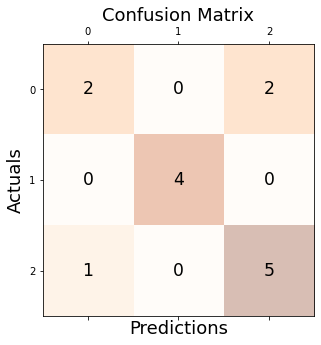

              precision    recall  f1-score   support

   1035167.0       0.67      0.50      0.57         4
   1035185.0       1.00      1.00      1.00         4
   1035194.0       0.71      0.83      0.77         6

    accuracy                           0.79        14
   macro avg       0.79      0.78      0.78        14
weighted avg       0.78      0.79      0.78        14



In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print(classification_report(y_test, y_pred))